# Desafío - Estimando curvas normales

## 1) Importe un csv desde internet

Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
import pandas as pd
import numpy as np

rnv_df = pd.read_csv('subsample_RNV_demo.csv')

## 2) Importe su conjunto de funciones

Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión
pasada e impórtelo.

Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de
su compañero.

In [2]:
import ancilliary_funcs as nicos

In [3]:
for var in rnv_df:
    missing_count, missing_rate = nicos.missing_observations(rnv_df, var)
    print("La variable '{}' tiene {} casos perdidos ({}%)".format(var, missing_count, round(missing_rate * 100)))

La variable 'Unnamed: 0' tiene 0 casos perdidos (0%)
La variable 'undp_hdi' tiene 4 casos perdidos (4%)
La variable 'ccodealp' tiene 0 casos perdidos (0%)
La variable 'ht_region' tiene 0 casos perdidos (0%)
La variable 'gle_cgdpc' tiene 1 casos perdidos (1%)
La variable 'imf_pop' tiene 25 casos perdidos (26%)
La variable 'wef_imort' tiene 22 casos perdidos (23%)
La variable 'who_alc2000' tiene 8 casos perdidos (8%)
La variable 'who_tobt' tiene 34 casos perdidos (35%)
La variable 'wdi_exph' tiene 3 casos perdidos (3%)
La variable 'region_recod' tiene 0 casos perdidos (0%)


## 3) Estime el puntaje Z

Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor
cantidad de datos perdidos

- Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: .
- Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.
- Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
- Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la documentación asociada al método subset .
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [4]:
nicos.describe_columns(rnv_df)

{'Unnamed: 0': count     97.000000
 mean      96.134021
 std       51.397477
 min        2.000000
 25%       55.000000
 50%       97.000000
 75%      132.000000
 max      192.000000
 Name: Unnamed: 0, dtype: float64, 'undp_hdi': count    93.000000
 mean      0.721204
 std       0.163225
 min       0.351000
 25%       0.615000
 50%       0.773000
 75%       0.846000
 max       0.948000
 Name: undp_hdi, dtype: float64, 'ccodealp': NER    1
 STP    1
 SLV    1
 POL    1
 HND    1
 ISR    1
 TTO    1
 GNQ    1
 CAN    1
 ARM    1
 HTI    1
 VEN    1
 BFA    1
 TUR    1
 YEM    1
 OMN    1
 LSO    1
 GIN    1
 ISL    1
 LUX    1
 URY    1
 NAM    1
 MNG    1
 PLW    1
 MDV    1
 MWI    1
 SSD    1
 JPN    1
 BGR    1
 SWE    1
       ..
 BDI    1
 CIV    1
 PRY    1
 KOR    1
 LTU    1
 EST    1
 GNB    1
 FRA    1
 NLD    1
 USA    1
 DEU    1
 FSM    1
 KAZ    1
 BEL    1
 MKD    1
 MEX    1
 SMR    1
 TWN    1
 PRT    1
 KWT    1
 BHS    1
 BLR    1
 BHR    1
 IDN    1
 CUB    1
 LIE    

Por ser tipo de dato continuo, voy a trabajar sobre las siguientes variables:

- undp_hdi
- gle_cgdpc
- wdi_exph

In [5]:
best_columns = ['undp_hdi', 'gle_cgdpc', 'wdi_exph']

In [6]:
for var in best_columns:
    x = rnv_df[var]
    rnv_df['z_{}'.format(var)] = (x - x.mean()) / x.std()

In [7]:
sorted_dataframes = {}

for var in best_columns:
    z_score_column = 'z_{}'.format(var)
    df_with_valid_z_score = rnv_df.dropna(subset=[z_score_column])
    df_sorted = df_with_valid_z_score.sort_values(by=z_score_column)
    sorted_dataframes[var] = df_sorted

### undp_hdi

In [8]:
sorted_dataframes['undp_hdi'].head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
60,125,0.351,NER,4,644.53998,NaN,NaN,0.15,8.4,5.821299,SubSaharian,-2.268058,-0.837557,-0.481413
74,187,0.399,BFA,4,1095.96000,16.500,65.800003,4.64,19.1,4.960263,SubSaharian,-1.973986,-0.816773,-0.779986
28,26,0.406,BDI,4,663.57001,NaN,66.900002,4.16,NaN,7.535565,SubSaharian,-1.931101,-0.836681,0.113025
71,70,0.414,GIN,4,993.83002,11.745,65.199997,0.22,NaN,5.644798,SubSaharian,-1.882089,-0.821475,-0.542617
27,55,0.418,ERI,4,1007.28000,NaN,NaN,0.62,NaN,3.338293,SubSaharian,-1.857582,-0.820856,-1.342420
25,163,0.421,SSD,4,NaN,NaN,NaN,NaN,NaN,2.738421,SubSaharian,-1.839203,NaN,-1.550431
9,139,0.421,GNB,4,961.26001,NaN,NaN,3.57,NaN,5.593137,SubSaharian,-1.839203,-0.822975,-0.560531
20,97,0.427,LBR,4,488.26999,NaN,53.599998,3.72,14.2,10.036333,SubSaharian,-1.802444,-0.844752,0.980191
37,106,0.438,MLI,4,1063.26000,14.854,79.599998,0.61,18.6,6.862166,SubSaharian,-1.735053,-0.818278,-0.120482
66,83,0.466,CIV,4,1354.29000,22.524,76.199997,3.15,NaN,5.716274,SubSaharian,-1.563510,-0.804879,-0.517832


In [9]:
sorted_dataframes['undp_hdi'].tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
80,167,0.909,SWE,5,39000.910,9.645000,2.3,7.30,21.900000,11.929840,WesternDem,1.150531,0.928462,1.636783
84,99,0.911,LIE,5,102243.520,NaN,NaN,NaN,NaN,NaN,WesternDem,1.162784,3.840304,NaN
23,186,0.918,USA,5,47769.699,318.789001,6.0,8.82,18.100000,17.140755,WesternDem,1.205670,1.332198,3.443719
30,75,0.919,ISL,5,31313.609,0.329000,1.8,7.45,17.500000,8.859166,WesternDem,1.211796,0.574520,0.571997
59,30,0.919,CAN,5,36577.078,35.495998,4.7,8.10,16.200001,10.449582,WesternDem,1.211796,0.816863,1.123489
17,48,0.923,DNK,5,37406.762,5.627000,3.0,9.64,18.900000,10.804957,WesternDem,1.236302,0.855064,1.246719
40,121,0.923,NLD,5,42258.352,16.865000,3.4,8.68,25.700001,10.897293,WesternDem,1.236302,1.078443,1.278737
81,64,0.924,DEU,5,39486.699,80.983002,3.4,11.03,30.700001,11.297001,WesternDem,1.242429,0.950829,1.417340
77,168,0.938,CHE,5,50454.410,8.140000,3.7,9.61,24.100000,11.659268,WesternDem,1.328200,1.455809,1.542960
93,127,0.948,NOR,5,57634.770,5.156000,2.2,6.06,24.100000,9.719718,WesternDem,1.389465,1.786410,0.870402


**Observaciones**:

- En este caso, podemos ver que las primeras 10 posiciones para el `z-score` del **el índice de desarrollo humano** (`undp_hdi`) lo ocupa la región SubSaharian mientras que las 10 últimas la región WesternDem.

- Hay que notar que el mejor de los 10 peores `z-score` está `1.56` veces la desviación estándar bajo la media, a diferencia del mejor de los 10 mejores: `1.39` veces sobre la media.

- Hay un mayor rango de `z-score` en los 10 peores que en los 10 mejores.

### gle_cgdpc

In [10]:
sorted_dataframes['gle_cgdpc'].head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
56,52,0.678,SLV,2,332.26999,NaN,13.600000,2.52,NaN,6.772403,LatAm,-0.264692,-0.851935,-0.151609
20,97,0.427,LBR,4,488.26999,NaN,53.599998,3.72,14.200000,10.036333,SubSaharian,-1.802444,-0.844752,0.980191
60,125,0.351,NER,4,644.53998,NaN,NaN,0.15,8.400000,5.821299,SubSaharian,-2.268058,-0.837557,-0.481413
28,26,0.406,BDI,4,663.57001,NaN,66.900002,4.16,NaN,7.535565,SubSaharian,-1.931101,-0.836681,0.113025
89,103,0.473,MWI,4,938.34998,17.604,46.000000,1.23,16.299999,11.377956,SubSaharian,-1.520625,-0.824029,1.445412
9,139,0.421,GNB,4,961.26001,NaN,NaN,3.57,NaN,5.593137,SubSaharian,-1.839203,-0.822975,-0.560531
71,70,0.414,GIN,4,993.83002,11.745,65.199997,0.22,NaN,5.644798,SubSaharian,-1.882089,-0.821475,-0.542617
27,55,0.418,ERI,4,1007.28000,NaN,NaN,0.62,NaN,3.338293,SubSaharian,-1.857582,-0.820856,-1.342420
73,72,0.490,HTI,2,1024.93990,NaN,56.500000,5.68,11.800000,7.555654,LatAm,-1.416474,-0.820043,0.119991
37,106,0.438,MLI,4,1063.26000,14.854,79.599998,0.61,18.600000,6.862166,SubSaharian,-1.735053,-0.818278,-0.120482


In [11]:
sorted_dataframes['gle_cgdpc'].tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
40,121,0.923,NLD,5,42258.352,16.865000,3.4,8.68,25.700001,10.897293,WesternDem,1.236302,1.078443,1.278737
87,148,NaN,SMR,5,42664.211,0.034000,NaN,NaN,NaN,6.129065,WesternDem,NaN,1.097129,-0.374692
23,186,0.918,USA,5,47769.699,318.789001,6.0,8.82,18.100000,17.140755,WesternDem,1.205670,1.332198,3.443719
77,168,0.938,CHE,5,50454.410,8.140000,3.7,9.61,24.100000,11.659268,WesternDem,1.328200,1.455809,1.542960
93,127,0.948,NOR,5,57634.770,5.156000,2.2,6.06,24.100000,9.719718,WesternDem,1.389465,1.786410,0.870402
96,101,0.896,LUX,5,61404.480,0.550000,1.7,11.12,24.400000,6.937873,WesternDem,1.070887,1.959976,-0.094230
5,91,0.799,KWT,3,64342.711,3.999000,9.5,0.02,NaN,3.042368,NorthAfrica,0.476616,2.095259,-1.445035
84,99,0.911,LIE,5,102243.520,NaN,NaN,NaN,NaN,NaN,WesternDem,1.162784,3.840304,NaN
57,141,0.855,QAT,3,104049.440,2.045000,6.3,1.15,NaN,2.187062,NorthAfrica,0.819700,3.923453,-1.741620
72,111,NaN,MCO,5,108481.130,NaN,NaN,NaN,NaN,4.337683,WesternDem,NaN,4.127498,-0.995871


**Observaciones**

En el caso del PIB per cápita (`gle_cgdpc`):

- La mayoría de observaciones de los peores z-scores corresponden a SubSaharian, mientras que las mejores a WesternDem
- Hay poca variación de z-score entre los peores
- Hay mucha variación de z-score entre los mejores (con un rango mucho más amplio)

### wdi_exph

In [12]:
sorted_dataframes['wdi_exph'].head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
65,178,0.688,TKM,1,13217.3900,NaN,NaN,2.90,NaN,2.067386,EastEurope,-0.203426,-0.258673,-1.783119
57,141,0.855,QAT,3,104049.4400,2.045000,6.300000,1.15,NaN,2.187062,NorthAfrica,0.819700,3.923453,-1.741620
68,131,0.548,PAK,8,2855.5500,186.190002,69.300003,0.04,22.600000,2.613916,SouthAsia,-1.061137,-0.735757,-1.593605
25,163,0.421,SSD,4,NaN,NaN,NaN,NaN,NaN,2.738421,SubSaharian,-1.839203,NaN,-1.550431
7,77,0.686,IDN,7,4780.0098,252.164993,25.799999,0.09,38.500000,2.846860,SouthEastAsia,-0.215679,-0.647150,-1.512829
5,91,0.799,KWT,3,64342.7110,3.999000,9.500000,0.02,NaN,3.042368,NorthAfrica,0.476616,2.095259,-1.445035
27,55,0.418,ERI,4,1007.2800,NaN,NaN,0.62,NaN,3.338293,SubSaharian,-1.857582,-0.820856,-1.342420
53,153,0.781,SYC,4,9583.3203,0.090000,11.200000,9.72,26.700001,3.369817,SubSaharian,0.366339,-0.425994,-1.331489
15,61,0.694,GAB,4,14525.2800,NaN,42.400002,8.86,NaN,3.437472,SubSaharian,-0.166667,-0.198455,-1.308029
94,117,0.795,OMN,3,26158.7300,3.717000,10.000000,0.40,13.500000,3.553940,NorthAfrica,0.452110,0.337177,-1.267642


In [13]:
sorted_dataframes['wdi_exph'].tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z_undp_hdi,z_gle_cgdpc,z_wdi_exph
40,121,0.923,NLD,5,42258.35200,16.865000,3.4,8.68,25.700001,10.897293,WesternDem,1.236302,1.078443,1.278737
85,44,0.773,CUB,2,5899.93990,NaN,NaN,4.37,36.099998,11.058801,LatAm,0.317327,-0.595586,1.334742
81,64,0.924,DEU,5,39486.69900,80.983002,3.4,11.03,30.700001,11.297001,WesternDem,1.242429,0.950829,1.417340
89,103,0.473,MWI,4,938.34998,17.604000,46.0,1.23,16.299999,11.377956,SubSaharian,-1.520625,-0.824029,1.445412
35,59,0.894,FRA,5,34007.89800,64.028000,3.4,11.50,28.100000,11.539519,WesternDem,1.058634,0.698572,1.501436
77,168,0.938,CHE,5,50454.41000,8.140000,3.7,9.61,24.100000,11.659268,WesternDem,1.328200,1.455809,1.542960
80,167,0.909,SWE,5,39000.91000,9.645000,2.3,7.30,21.900000,11.929840,WesternDem,1.150531,0.928462,1.636783
13,128,0.637,FSM,9,2624.05000,0.102000,NaN,1.58,NaN,13.706915,Pacific,-0.515878,-0.746416,2.253001
43,105,0.701,MDV,8,13349.76000,0.336000,NaN,1.92,NaN,13.733521,SouthAsia,-0.123782,-0.252578,2.262227
23,186,0.918,USA,5,47769.69900,318.789001,6.0,8.82,18.100000,17.140755,WesternDem,1.205670,1.332198,3.443719


**Observaciones**:

Para el **Government expenditure on health, total (% of GDP)**:

- De los peores 10, el más repetido es SubSaharian
- De los mejores 10, el más repetido es WesternDem

### Observaciones en común

- Lo compartido entre todas estas muestras es que las observaciones de WesternDem abundan en los mejores z-score mientras que las de SubSaharian abundan en los de peores z-score.

## Estime el puntaje z de las regiones

Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.

In [14]:
df = pd.read_csv('qog_std_cs_jan18.csv') # no lo había importado 

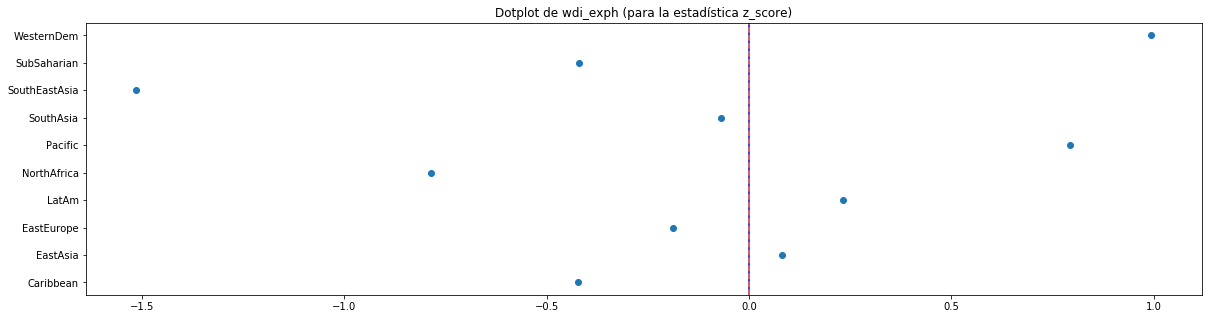

In [15]:
nicos.gen_dotplot(df, rnv_df, 'wdi_exph', 'region_recod', True, 'z_score')

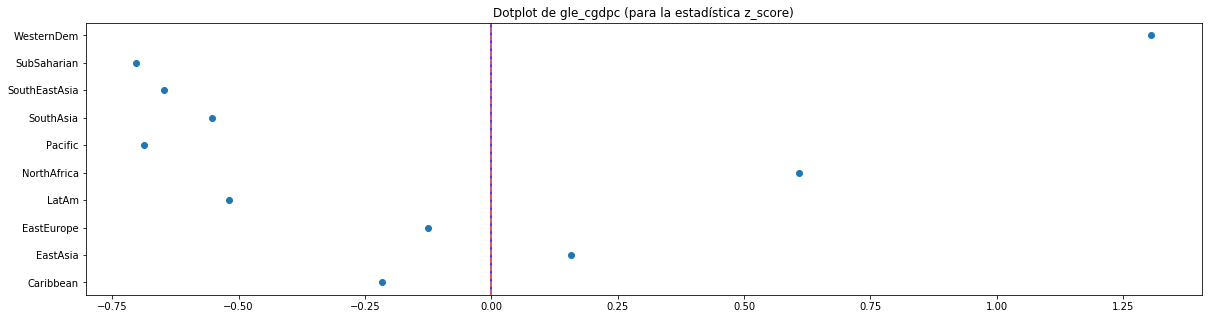

In [16]:
nicos.gen_dotplot(df, rnv_df, 'gle_cgdpc', 'region_recod', True, 'z_score')

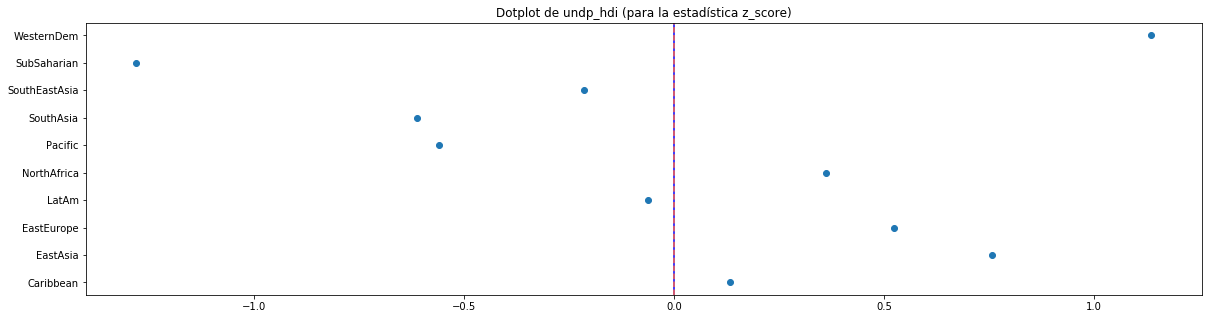

In [17]:
nicos.gen_dotplot(df, rnv_df, 'undp_hdi', 'region_recod', True, 'z_score')

⚠️⚠️⚠️ **Nota** ⚠️⚠️⚠️: el promedio DEBE ser 0 porque se está normalizando (al normalizar el promedio es 0 y std = 1)

## 5) Genere un método que devuelva un gráfico comparando dos curvas de densidad

- El método debe contener los siguientes argumentos:
    - df1 : Tabla de datos 1.
    - df2 : Tabla de datos 2.
    - variable : Variable a contrastar.
    - log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
- Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [34]:
def calcula_histograma(df, columna, color):
    plt.hist(df[columna], alpha=.5, density=True, bins=100)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 200)
    gauss_norm_empirica=stats.gaussian_kde(df[columna])
    Z=gauss_norm_empirica(x_axis)
    plt.plot(x_axis,Z, color=color, lw=3)

def compare_density_curves(df1, df2, variable, log = False):
    plt.figure(figsize=(15,5))
    calcula_histograma(df1.dropna(subset=[variable]), variable, color="red")
    calcula_histograma(df2.dropna(subset=[variable]), variable, color="blue")

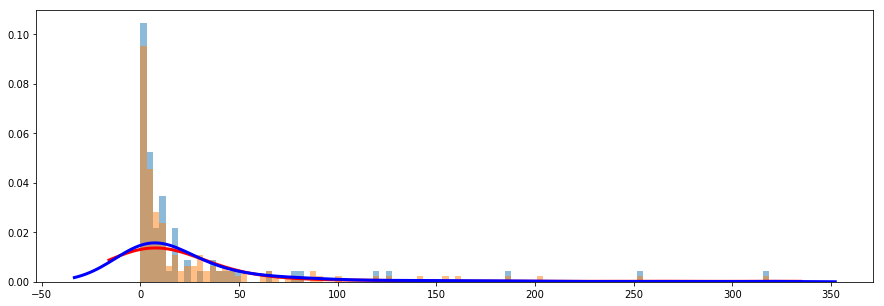

In [35]:
compare_density_curves(rnv_df, df, 'imf_pop')

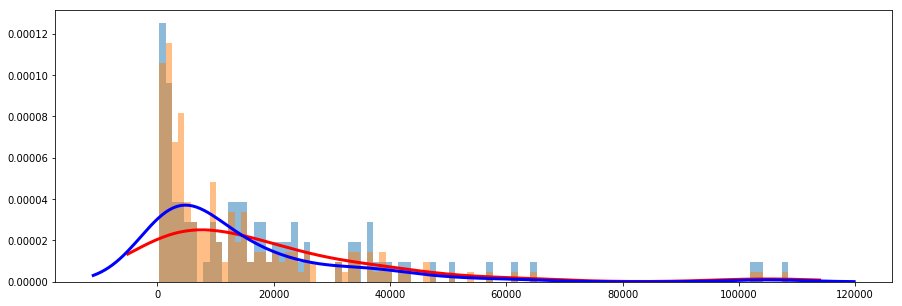

In [36]:
compare_density_curves(rnv_df, df, 'gle_cgdpc')

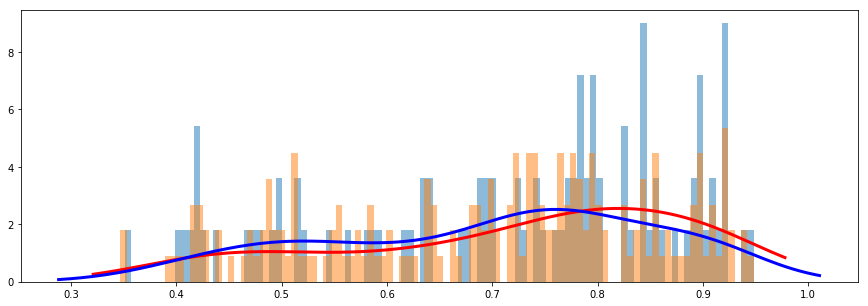

In [37]:
compare_density_curves(rnv_df, df, 'undp_hdi')